In [1]:
from datetime import datetime
from matplotlib import pyplot as plt
from numpy import arange
from py_eddy_tracker.appli.eddies import get_group, display_compare
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations

# TOEddies data

In [2]:
a_TOEddies = EddiesObservations.load_file("data/TOEddies/Anticyclonic_pers0mm_adt_20190103.nc")
c_TOEddies = EddiesObservations.load_file("data/TOEddies/Cyclonic_pers0mm_adt_20190103.nc")

# PET run

In [3]:
g = RegularGridDataset("data/input/dt_global_allsat_phy_l4_20190103_20190515.nc", "longitude", "latitude")
date = datetime(2019, 1, 3)

a_PET, c_PET = g.eddy_identification(
    "adt",
    "ugos",
    "vgos",
    date,
    step=0.0005,
    shape_error=100,
    sampling=25,
    pixel_limit=(4, 10000),
    nb_step_to_be_mle=0,
    nb_step_min=1,
)

We assume pixel position of grid is center for data/input/dt_global_allsat_phy_l4_20190103_20190515.nc
No extrema found in contour of 4 pixels in level 0.611500
No extrema found in contour of 4 pixels in level 0.229000
No extrema found in contour of 4 pixels in level -0.032500
No extrema found in contour of 4 pixels in level -0.033000
No extrema found in contour of 4 pixels in level -0.033500


Compare 2 versions with similarity function based on overlap

In [4]:
i_a, j_a, s_a = a_TOEddies.match(a_PET)
i_c, j_c, s_c = c_TOEddies.match(c_PET)
a_group_TOEddies, a_group_PET = get_group(
    a_TOEddies, a_PET, i_a, j_a, s_a, high=80, low=40, invalid=1
)
c_group_TOEddies, c_group_PET = get_group(
    c_TOEddies, c_PET, i_c, j_c, s_c, high=80, low=40, invalid=1
)

In [7]:
display_compare(a_TOEddies, dict(PET=a_PET), invalid=1, low=20, high=80)

[0] PET -> 3174 obs
          nomatch     1 <= low < 20  intermediate    80 <= high     multi_match      parent          twin          complex    
[ 0]     0.8% (21)      0.0% (0)       2.5% (69)    96.7% (2682)     0.0% (1)       0.0% (1)       0.0% (0)       0.0% (0)    
     Point of view of study dataset
          nomatch     1 <= low < 20  intermediate    80 <= high     multi_match      parent          twin          complex    
[ 0]    13.3% (421)     0.0% (0)       2.2% (69)    84.5% (2682)     0.1% (2)       0.0% (0)       0.1% (2)       0.0% (0)    


In [10]:
display_compare(c_TOEddies, dict(PET=c_PET), invalid=1, low=20, high=80)

[0] PET -> 3396 obs
          nomatch     1 <= low < 20  intermediate    80 <= high     multi_match      parent          twin          complex    
[ 0]     1.1% (32)      0.1% (3)       2.5% (74)    96.3% (2866)     0.0% (1)       0.0% (1)       0.0% (0)       0.0% (0)    
     Point of view of study dataset
          nomatch     1 <= low < 20  intermediate    80 <= high     multi_match      parent          twin          complex    
[ 0]    13.3% (451)     0.1% (3)       2.2% (74)    84.4% (2866)     0.1% (2)       0.0% (0)       0.1% (2)       0.0% (0)    


## Histogram of similarity index
- 100 => same
- 0 => no overlap

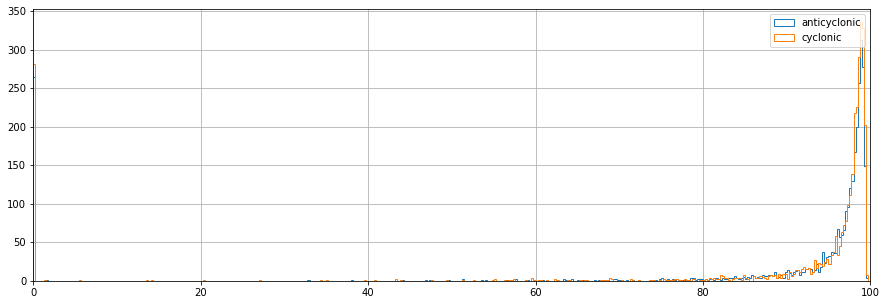

In [30]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
kw = dict(bins=arange(0,101,.25), histtype="step")
ax.hist(s_a * 100, label="anticyclonic", **kw)
ax.hist(s_c * 100, label="cyclonic", **kw)
ax.legend(), ax.set_xlim(0,100), ax.set_ylim(0)
ax.grid()

General options for each dataset

In [13]:
kw_aTOE = dict(label="TOEddies anticyclonic {nb_obs} observations", color="r")
kw_cTOE = dict(label="TOEddies cyclonic {nb_obs} observations", color="b")
kw_aPET = dict(label="PET anticyclonic {nb_obs} observations", color="orange")
kw_cPET = dict(label="PET cyclonic {nb_obs} observations", color="lightblue")

In [11]:
a_TOEddies_nomatch = a_TOEddies.index(a_group_TOEddies["nomatch"])
a_PET_nomatch = a_PET.index(a_group_PET["nomatch"])
c_TOEddies_nomatch = c_TOEddies.index(c_group_TOEddies["nomatch"])
c_PET_nomatch = c_PET.index(c_group_PET["nomatch"])

a_TOEddies_intermediate = a_TOEddies.index(a_group_TOEddies["intermediate"])
a_PET_intermediate = a_PET.index(a_group_PET["intermediate"])
c_TOEddies_intermediate = c_TOEddies.index(c_group_TOEddies["intermediate"])
c_PET_intermediate = c_PET.index(c_group_PET["intermediate"])

## No match of each dataset

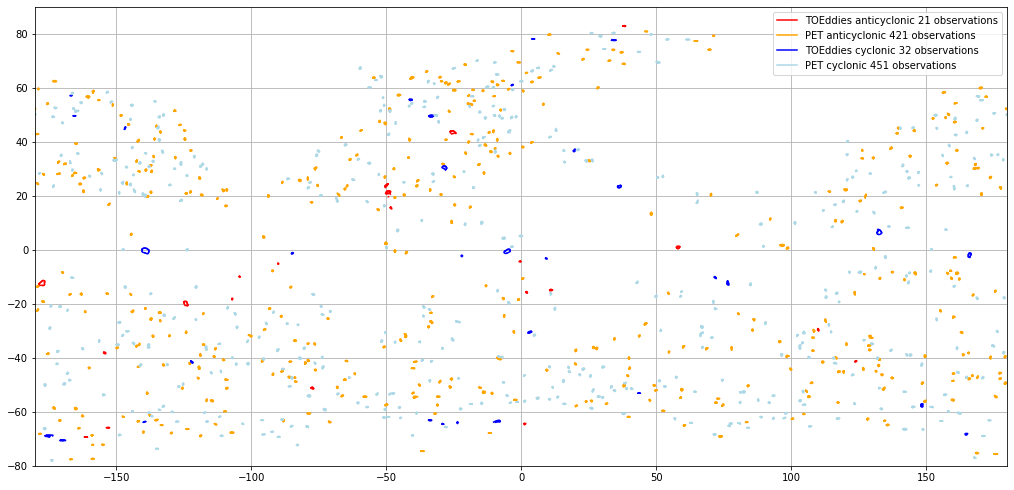

In [14]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
a_TOEddies_nomatch.display(ax, ref=-180, **kw_aTOE)
a_PET_nomatch.display(ax, ref=-180, **kw_aPET)
c_TOEddies_nomatch.display(ax, ref=-180, **kw_cTOE)
c_PET_nomatch.display(ax, ref=-180, **kw_cPET)
ax.legend(), ax.set_aspect('equal'), ax.set_xlim(-180,180), ax.set_ylim(-80,90)
ax.grid()

### Property of nomatch

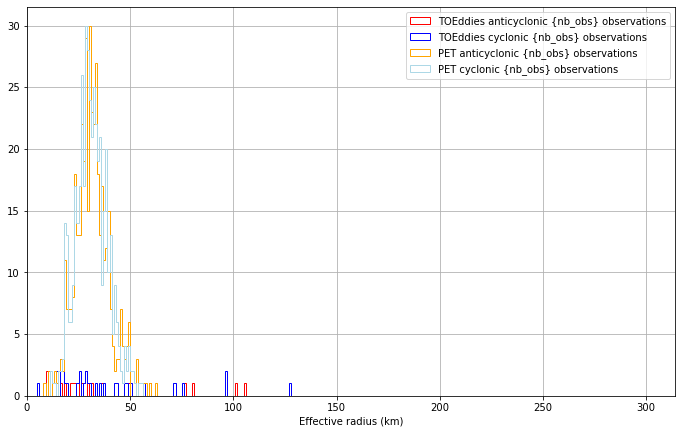

In [60]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
kw = dict(bins=arange(0, 300, 1), histtype="step")
ax.hist(a_TOEddies_nomatch.effective_radius * 1e-3, **kw_aTOE, **kw)
ax.hist(c_TOEddies_nomatch.effective_radius * 1e-3, **kw_cTOE, **kw)
ax.hist(a_PET_nomatch.effective_radius * 1e-3, **kw_aPET, **kw)
ax.hist(c_PET_nomatch.effective_radius * 1e-3, **kw_cPET, **kw)
ax.legend(), ax.set_xlim(0), ax.set_xlabel('Effective radius (km)')
ax.grid()

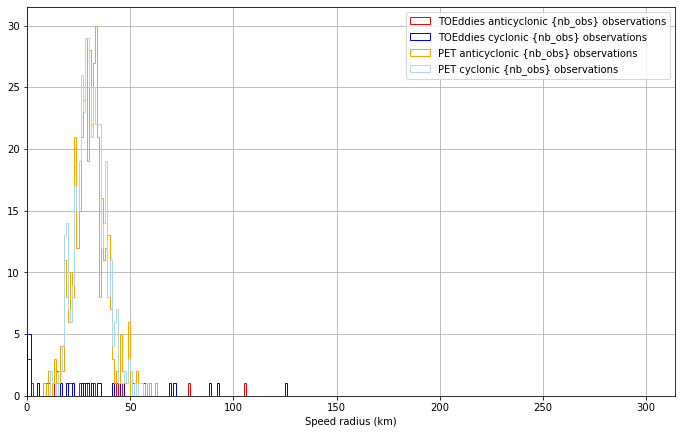

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
kw = dict(bins=arange(0, 300, 1), histtype="step")
ax.hist(a_TOEddies_nomatch.speed_radius * 1e-3, **kw_aTOE, **kw)
ax.hist(c_TOEddies_nomatch.speed_radius * 1e-3, **kw_cTOE, **kw)
ax.hist(a_PET_nomatch.speed_radius * 1e-3, **kw_aPET, **kw)
ax.hist(c_PET_nomatch.speed_radius * 1e-3, **kw_cPET, **kw)
ax.legend(), ax.set_xlim(0), ax.set_xlabel('Speed radius (km)')
ax.grid()

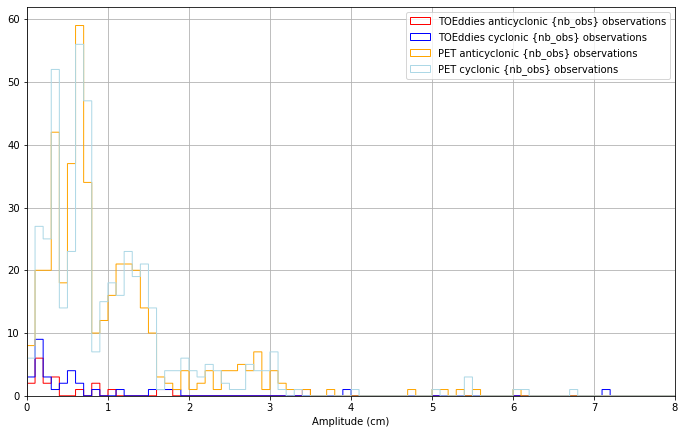

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
kw = dict(bins=arange(0, 100, .1), histtype="step")
ax.hist(a_TOEddies_nomatch.amplitude * 1e2, **kw_aTOE, **kw)
ax.hist(c_TOEddies_nomatch.amplitude * 1e2, **kw_cTOE, **kw)
ax.hist(a_PET_nomatch.amplitude * 1e2, **kw_aPET, **kw)
ax.hist(c_PET_nomatch.amplitude * 1e2, **kw_cPET, **kw)
ax.legend(), ax.set_xlim(0, 8), ax.set_xlabel('Amplitude (cm)')
ax.grid()

## Intermediate of each dataset

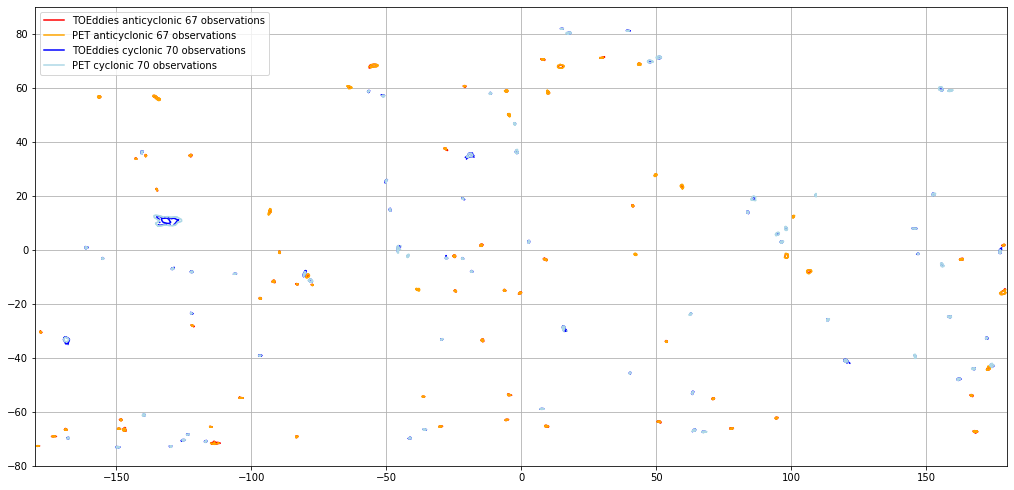

In [15]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
a_TOEddies_intermediate.display(ax, ref=-180, **kw_aTOE)
a_PET_intermediate.display(ax, ref=-180, **kw_aPET)
c_TOEddies_intermediate.display(ax, ref=-180, **kw_cTOE)
c_PET_intermediate.display(ax, ref=-180, **kw_cPET)
ax.legend(), ax.set_aspect('equal'), ax.set_xlim(-180,180), ax.set_ylim(-80,90)
ax.grid()